In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_DenseNet201.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 16
best_epochs	= 15


base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

x = base_model.output
x = tf.keras.layers.Activation('relu')(x) # Activation function BEFORE batch norm
x = BatchNormalization()(x)
x = Dropout(best_dropout)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = tf.keras.layers.Activation('relu')(x) # Activation function BEFORE batch norm
x = BatchNormalization()(x)


# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# JUST ADDED: get init accuracy before training
initial_loss_val, initial_accuracy_val = model.evaluate(VAL_GENERATOR)
initial_loss_train, initial_accuracy_train = model.evaluate(TRAIN_GENERATOR)

print("Metrics Before Training:")
print(f" - Training   -> Loss: {initial_loss_train:.4f}, Accuracy: {initial_accuracy_train:.4f}")
print(f" - Validation -> Loss: {initial_loss_val:.4f}, Accuracy: {initial_accuracy_val:.4f}")

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)

# append intial values for plotting
history.history['accuracy'].insert(0, initial_accuracy_train) #training
history.history['loss'].insert(0, initial_loss_train)  # training

history.history['val_accuracy'].insert(0, initial_accuracy_val)  # validation
history.history['val_loss'].insert(0, initial_loss_val)  # validation




/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - accuracy: 0.0784 - loss: 3.8769
191/191 ━━━━━━━━━━━━━━━━━━━━ 160s 837ms/step - accuracy: 0.0654 - loss: 3.8699
Metrics Before Training:
 - Training   -> Loss: 3.8845, Accuracy: 0.0675
 - Validation -> Loss: 3.8767, Accuracy: 0.0727
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 172s 866ms/step - accuracy: 0.4840 - loss: 2.3538 - val_accuracy: 0.7091 - val_loss: 1.4160
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 165s 865ms/step - accuracy: 0.8014 - loss: 1.0429 - val_accuracy: 0.7318 - val_loss: 1.1958
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 167s 873ms/step - accuracy: 0.8461 - loss: 0.8909 - val_accuracy: 0.7545 - val_loss: 1.1191
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 167s 874ms/step - accuracy: 0.8527 - loss: 0.8539 - val_accuracy: 0.7523 - val_loss: 1.0772
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 166s 872ms/step - accuracy: 0.8638 - loss: 0.8265 - val_accuracy: 0.7568 - val_loss: 1.0630
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 164s 858ms/step - accura

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 938ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.720930,0.775000,0.746988,40.000000
american_house_spider,0.815789,0.775000,0.794872,40.000000
bedbug,0.800000,0.700000,0.746667,40.000000
brown_stink_bug,0.818182,0.900000,0.857143,40.000000
carpenter_ant,0.738095,0.775000,0.756098,40.000000
cellar_spider,0.935484,0.725000,0.816901,40.000000
flea,0.462963,0.625000,0.531915,40.000000
house_centipede,0.948718,0.925000,0.936709,40.000000
silverfish,0.837838,0.775000,0.805195,40.000000
subterranean_termite,0.694444,0.625000,0.657895,40.000000


<Figure size 800x600 with 0 Axes>

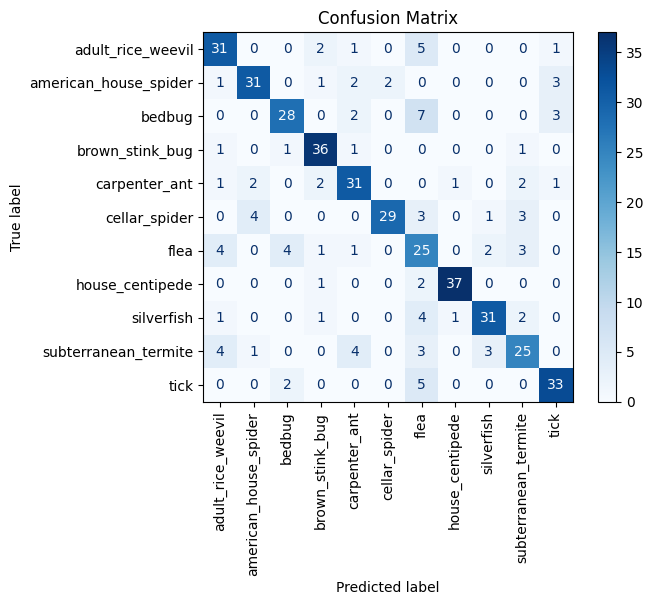

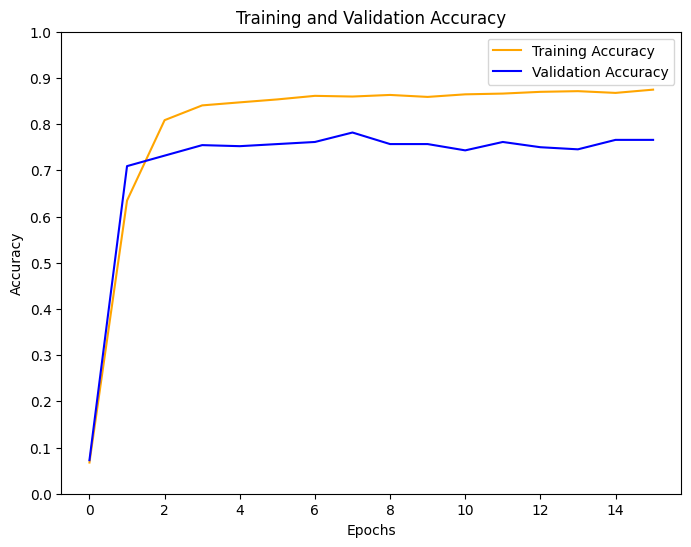

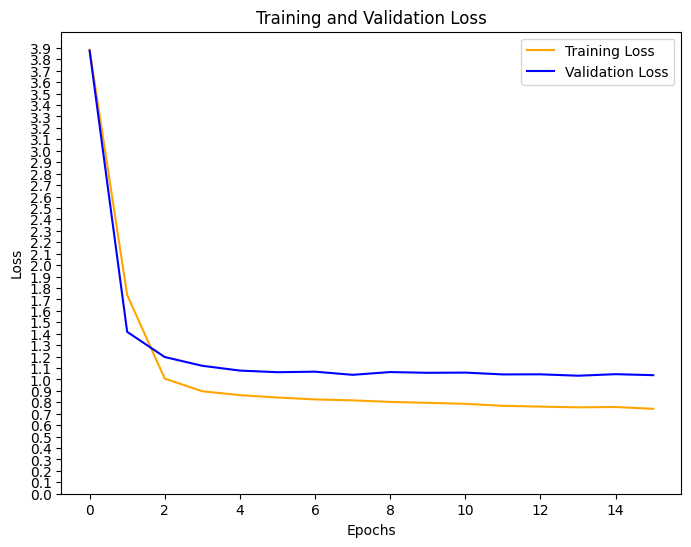

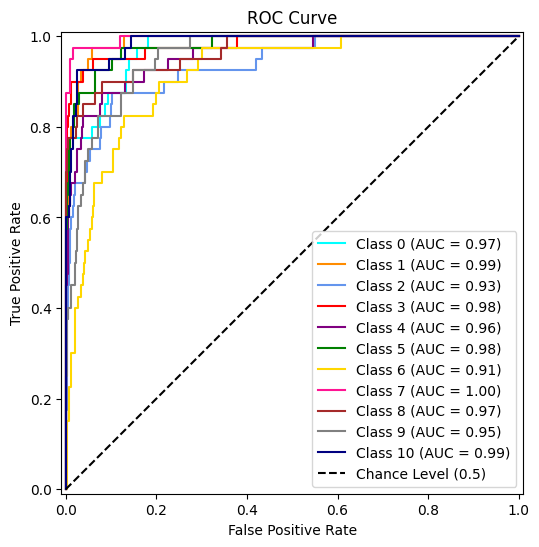

Macro-averaged One-vs-Rest ROC AUC score: 0.97
Accuracy: 0.766
Precision: 0.78
Recall: 0.766
F1 Score: 0.77


{'accuracy': 0.766,
 'precision': 0.78,
 'recall': 0.766,
 'f1_score': 0.77,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.720930  0.775000  0.746988   40.000000
 american_house_spider   0.815789  0.775000  0.794872   40.000000
 bedbug                  0.800000  0.700000  0.746667   40.000000
 brown_stink_bug         0.818182  0.900000  0.857143   40.000000
 carpenter_ant           0.738095  0.775000  0.756098   40.000000
 cellar_spider           0.935484  0.725000  0.816901   40.000000
 flea                    0.462963  0.625000  0.531915   40.000000
 house_centipede         0.948718  0.925000  0.936709   40.000000
 silverfish              0.837838  0.775000  0.805195   40.000000
 subterranean_termite    0.694444  0.625000  0.657895   40.000000
 tick                    0.804878  0.825000  0.814815   40.000000
 accuracy                0.765909  0.765909  0.765909    0.765909
 macro avg               0.779757  0.

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)

# Validation metrics: 'accuracy': 0.766,'precision': 0.78,'recall': 0.766,'f1_score': 0.77

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 795ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.619048,0.650000,0.634146,20.000000
american_house_spider,0.950000,0.950000,0.950000,20.000000
bedbug,0.611111,0.550000,0.578947,20.000000
brown_stink_bug,0.761905,0.800000,0.780488,20.000000
carpenter_ant,0.833333,0.750000,0.789474,20.000000
cellar_spider,1.000000,0.750000,0.857143,20.000000
flea,0.454545,0.750000,0.566038,20.000000
house_centipede,1.000000,0.750000,0.857143,20.000000
silverfish,0.833333,0.750000,0.789474,20.000000
subterranean_termite,0.619048,0.650000,0.634146,20.000000


<Figure size 800x600 with 0 Axes>

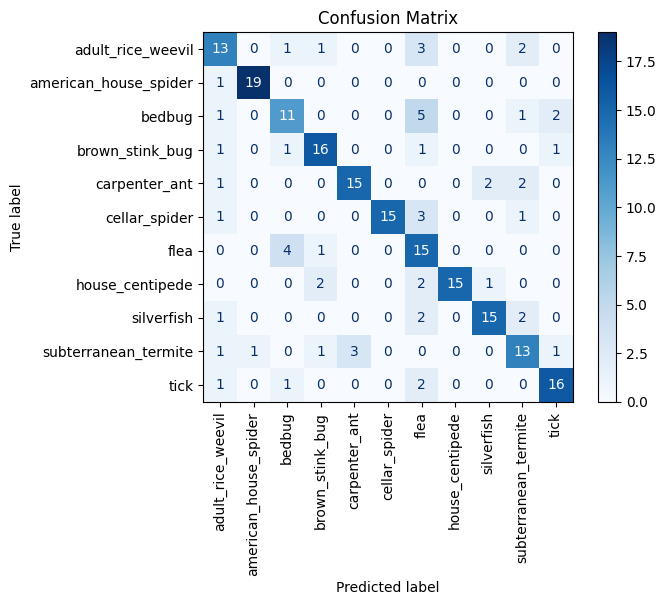

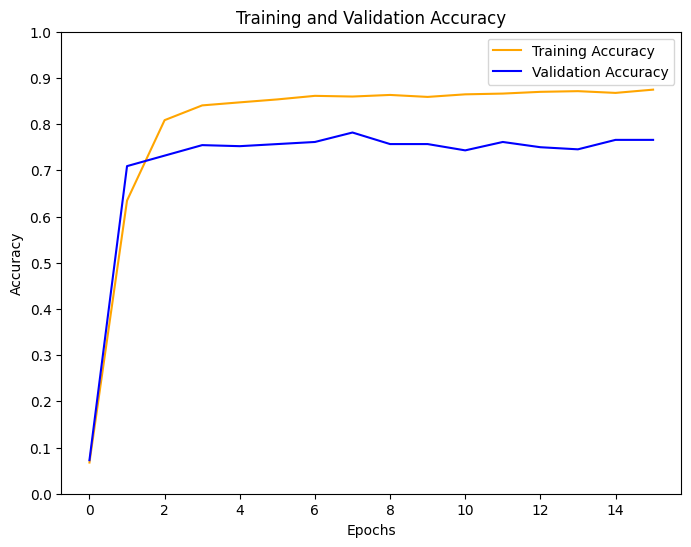

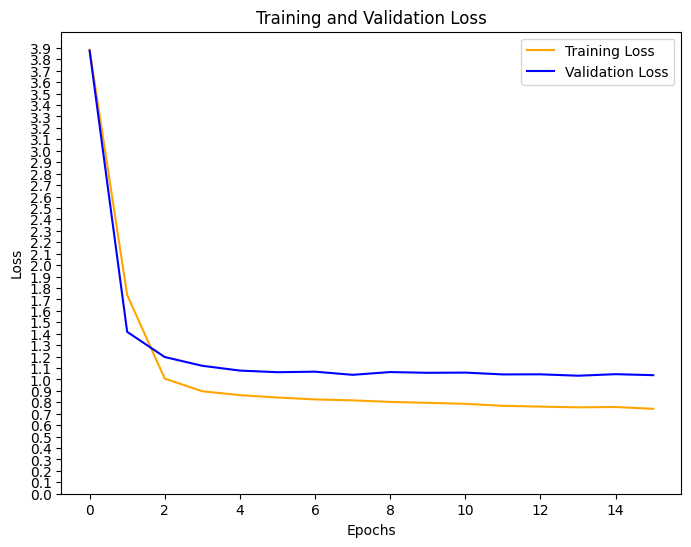

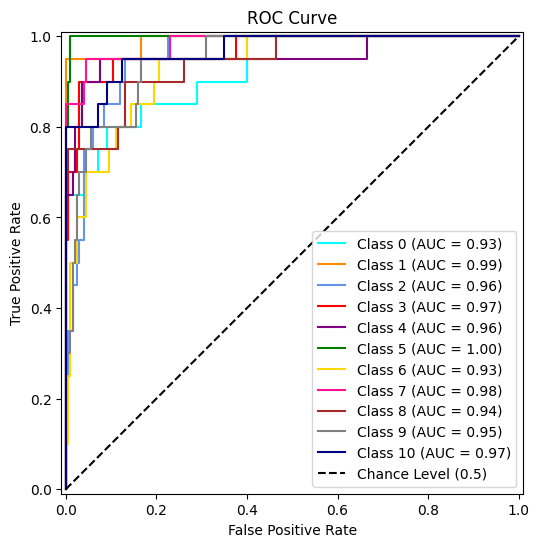

Macro-averaged One-vs-Rest ROC AUC score: 0.96
Accuracy: 0.741
Precision: 0.771
Recall: 0.741
F1 Score: 0.749


{'accuracy': 0.741,
 'precision': 0.771,
 'recall': 0.741,
 'f1_score': 0.749,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.619048  0.650000  0.634146   20.000000
 american_house_spider   0.950000  0.950000  0.950000   20.000000
 bedbug                  0.611111  0.550000  0.578947   20.000000
 brown_stink_bug         0.761905  0.800000  0.780488   20.000000
 carpenter_ant           0.833333  0.750000  0.789474   20.000000
 cellar_spider           1.000000  0.750000  0.857143   20.000000
 flea                    0.454545  0.750000  0.566038   20.000000
 house_centipede         1.000000  0.750000  0.857143   20.000000
 silverfish              0.833333  0.750000  0.789474   20.000000
 subterranean_termite    0.619048  0.650000  0.634146   20.000000
 tick                    0.800000  0.800000  0.800000   20.000000
 accuracy                0.740909  0.740909  0.740909    0.740909
 macro avg               0.771120  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)

# Test metrics: 'accuracy': 0.741, 'precision': 0.771,'recall': 0.741, 'f1_score': 0.749